## Linear Regression, Part 2

In this notebook, we'll see how we can add more complexity to our linear regression model.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

We'll be working with a dataset which includes information on the winner of the Kentucky Derby from 1896 through 2017. We will explore how different factors influence the winner's speed.

This notebook is largely based on [Chapter 1 of Beyond Multiple Linear Regression](https://bookdown.org/roback/bookdown-BeyondMLR/ch-MLRreview.html#multreg), an excellent resource for understanding statistical models.

In [2]:
derby = pd.read_csv('../data/derbyplus.csv')

In [3]:
derby

,year,winner,condition,speed,starters
0,1896,Ben Brush,good,51.66,8
1,1897,Typhoon II,slow,49.81,6
2,1898,Plaudit,good,51.16,4
3,1899,Manuel,fast,50.00,5
4,1900,Lieut. Gibson,fast,52.28,7
...,...,...,...,...,...
117,2013,Orb,slow,53.71,19
118,2014,California Chrome,fast,53.37,19
119,2015,American Pharoah,fast,53.65,18
120,2016,Nyquist,fast,54.41,20


The `speed` variable gives the speed of the winner in feet per second. We will be using this data to look at how the other variables affect this speed variable.

**Questions:**
1. How does the condition of the track affect the speed of the winner, after controlling for the year?
2. Does the number of starters have a statistically significant effect, after controlling for the year and the condition of the track?

## Exploratory Analysis

Before building a model, let's start with exploratory analysis to understand the data that we have and the relationships between different variables.

#### Single-Variable Analysis 
We can start with single-variable analysis. With this dataset, we are most interested in the speed column, so let's look at it first.

In [4]:
derby['speed'].describe()

count    122.000000
mean      53.169016
std        1.289433
min       48.820000
25%       52.652500
50%       53.480000
75%       54.100000
max       55.280000
Name: speed, dtype: float64

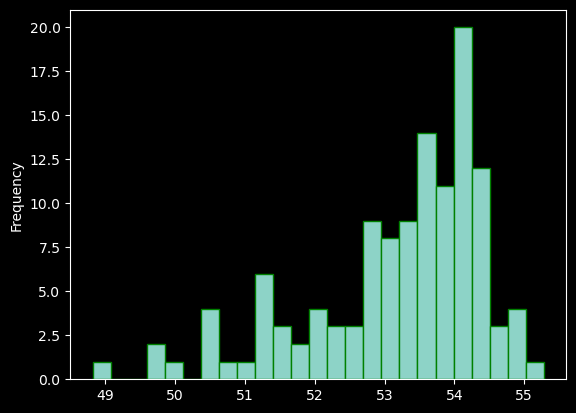

In [39]:
derby['speed'].plot(kind = "hist", 
                    edgecolor = 'green',
                    bins = 25);

Let's also look at the number of starters.

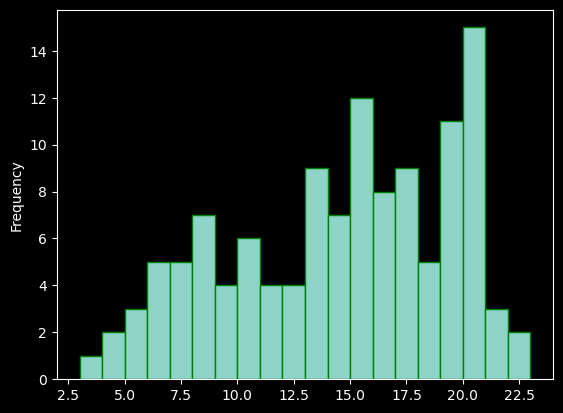

In [40]:
derby['starters'].plot(kind = "hist", 
                    edgecolor = 'green',
                    bins = 20);

A factor that could influence the speed of the winner is the condition of the track.

The possible conditions are:
* Fast Track – Dry, even, and fast
* Wet Fast – Soaked on the surface but still firm under the top layer
* Good Track – A little wet, but still pretty fast
* Muddy Track – Soaked and saturated. Ample amounts of mud
* Sloppy – Similar to wet fast, “sloppy” describes track conditions which are firm underneath but present horses and jockeys with standing water or slick spots on top of the dirt
* Slow – Somewhere between sloppy and heavy
* Heavy – Heavy mud, the slowest possible racing conditions

In our dataset, "fast" denotes a fast or a wet fast track, "good" denotes a good track, and "slow" denotes a muddy, sloppy, slow, or heavy track.

In [7]:
derby['condition'].value_counts(normalize = True)

condition
fast    0.721311
slow    0.196721
good    0.081967
Name: proportion, dtype: float64

#### Multi-Variable Analysis

Now, let's see what the relationships with the other variables and the speed of the winner look like.

Let's start with the year.

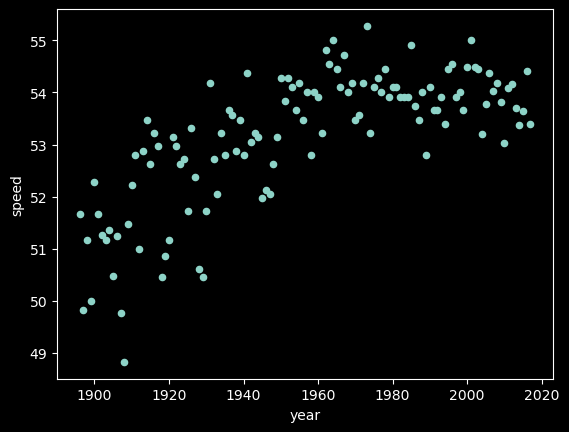

In [8]:
derby.plot(x = 'year', y = 'speed', kind = 'scatter');

**Question:** What can we say about the relationship between the year and the speed of the winner?

Now, let's check the condition of the track vs. the speed of the winner.

In [9]:
derby.groupby('condition')['speed'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
fast,88.0,53.623068,0.938899,50.00,53.2300,53.920,54.1900,55.28
good,10.0,52.726000,1.020383,51.16,51.8025,52.970,53.4175,54.10
slow,24.0,51.688750,1.358094,48.82,50.5775,51.845,52.8000,53.81


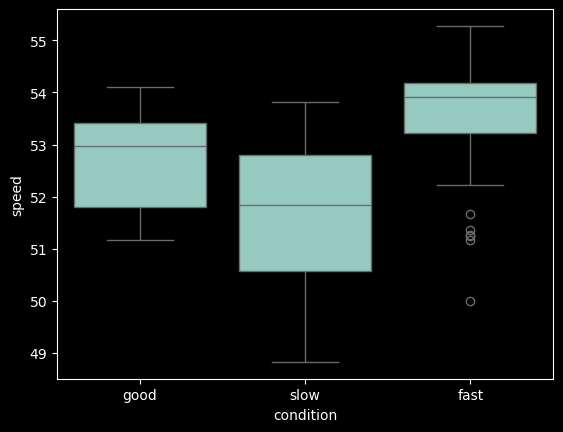

In [10]:
sns.boxplot(data = derby,
           x = 'condition',
           y = 'speed');

Finally, let's see how the relationship between the number of starters and the speed looks.

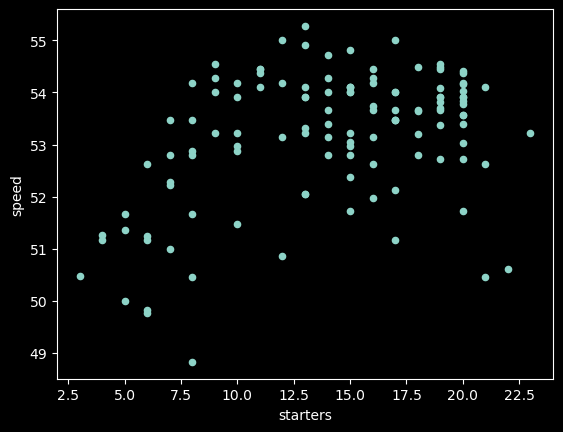

In [11]:
derby.plot(kind = 'scatter', x = 'starters', y = 'speed');

It looks like as the number of starters increases, the speed increases as well. But maybe there is something else going on. What does it look like if we compare the year to the number of starters?

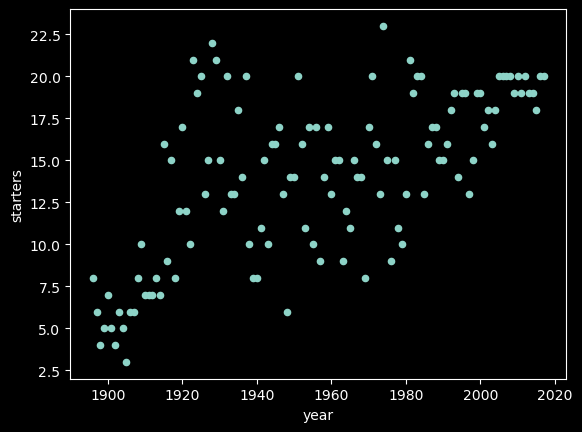

In [12]:
derby.plot(kind = 'scatter', x = 'year', y = 'starters');

**Question:** What does this plot reveal?

- the early years are when there were a very low number of starters, which could be the reason the speed was so much slower during those years and in comparison to the number of starters. 

## Fitting a Linear Regression Model

In order to fit a linear regression model, we'll make use of the formula api from statsmodels. This allows us to specify a [patsy formula](https://patsy.readthedocs.io/en/latest/formulas.html) for our model. A patsy formula looks like

```'target variable ~ predictor variables'```

Let's start by fitting a model for the speed based on the year. This can help us understand the trend that we can see from our scatterplot.

In [13]:
lm = smf.ols('speed ~ year', data = derby).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.72e-20
Time:                        08:04:25   Log-Likelihood:                -159.69
No. Observations:                 122   AIC:                             323.4
Df Residuals:                     120   BIC:                             329.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0535      4.544      0.452      0.652      -6.943      11.050
year           0.0261      0.002     11.251      0.000       0.022       0.031
==============================================================================
Omnibus:                        6.270   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.832
Skew:                          -0.517   Prob(JB):                       0.0542
Kurtosis:                       3.281   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question:** How do we interpret these coefficients?

We can also plot our line on top of the scatterplot to visually see how well it seems to do.

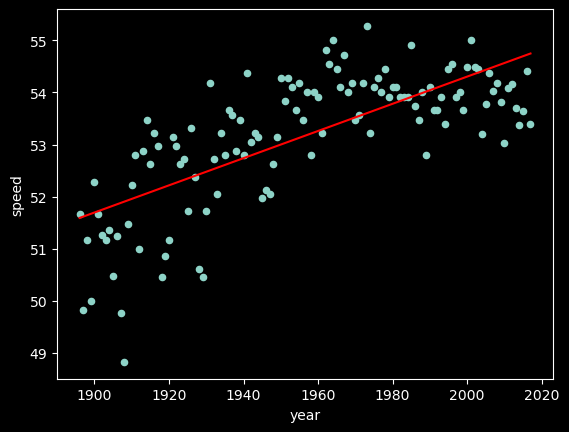

In [41]:
derby.plot(x = 'year', y = 'speed', kind = 'scatter')
plt.plot(derby['year'], lm.fittedvalues, color = 'red');

When fitting a linear regression model, we are assuming that there is a **linear** relationship between the predictor variables and the target variable. This means that a fixed change in the predictor has the same effect on the estimated mean of the target. In this case, the assumption of linearity would say that the average speed of the winner has been increasing at a constant rate over time.

We can sometimes spot a violation of this assumption through the original scatterplot or through a plot of the residuals. We want the residuals to appear to have no clear patterns.

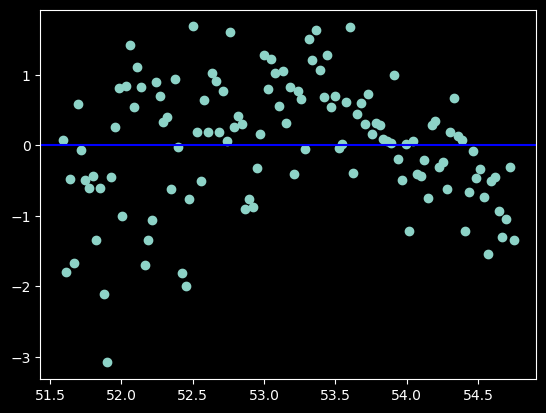

In [42]:
plt.scatter(lm.fittedvalues, lm.resid)
xmin, xmax = plt.xlim()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'blue')
plt.xlim(xmin, xmax);

The pattern that is visible in the residuals indicates that perhaps a quadratic fit might be better. We can do this by adding another predictor variable to our model.

In [16]:
lm_quad = smf.ols('speed ~ year + I(year**2)', data = derby).fit()
lm_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           3.37e-27
Time:                        08:04:25   Log-Likelihood:                -141.13
No. Observations:                 122   AIC:                             288.3
Df Residuals:                     119   BIC:                             296.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1580.6879    243.357     -6.495      0.000   -2062.559   -1098.817
year             1.6446      0.249      6.609      0.000       1.152       2.137
I(year ** 2)    -0.0004   6.36e-05     -6.505      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        9.573   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.646
Skew:                          -0.592   Prob(JB):                      0.00804
Kurtosis:                       3.705   Cond. No.                     1.32e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

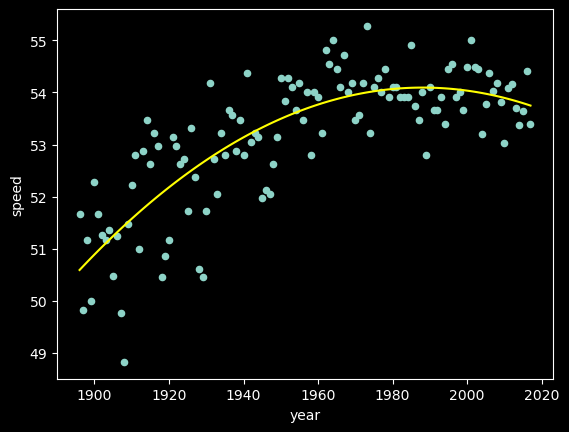

In [43]:
derby.plot(x = 'year', y = 'speed', kind = 'scatter')
plt.plot(derby['year'], lm_quad.fittedvalues, color = 'yellow');

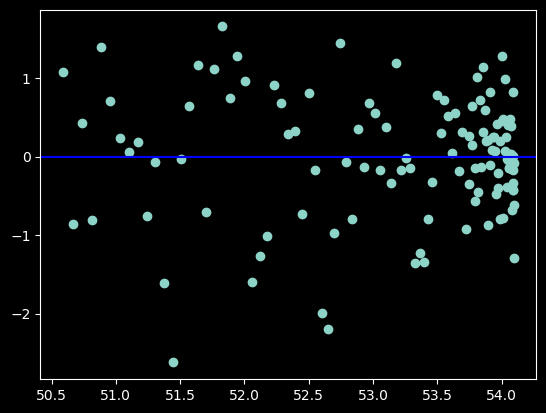

In [44]:
plt.scatter(lm_quad.fittedvalues, lm_quad.resid)
xmin, xmax = plt.xlim()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'blue')
plt.xlim(xmin, xmax);

Visually, it appears that the quadratic model is a better fit. However, if we want to check whether the coefficient on the squared term is statistically significant, we can do an [ANOVA test](https://online.stat.psu.edu/stat501/lesson/6/6.2) to compare the two models.

The null hypothesis for this test is that the coefficients for any new terms are all equal to zero and the alternative is that at least one is nonzero. In this case, the only new term is the squared term, so the alternative hypothesis says that this term has a nonzero coefficient.

In [19]:
sm.stats.anova_lm(lm, lm_quad)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,120.0,97.899297,0.0,NaN,NaN,NaN
1,119.0,72.221209,1.0,25.678089,42.310183,1.920684e-09


the p-value is the very bottom right value. a lower p-value means more likely to be statistically significant. 
The very small p-value in the bottom right indicates that there is statistically signicant evidence that the quadratic term has a nonzero coefficient.

You may have noticed that statsmodels issues a warning:
```
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
```

We can remove this warning by standardizing our predictor variable. To do this, we subtract the mean and divide by the standard deviation. The result is that we have predictor variables with mean 0 and standard deviation 1.

This does make it more difficult to interpret the results, but it can help statsmodels to fit the model.

In [20]:
derby['year_z'] = (derby['year'] - derby['year'].mean()) / derby['year'].std()

In [21]:
lm_quad = smf.ols('speed ~ year_z + I(year_z**2)', data = derby).fit()
lm_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           3.37e-27
Time:                        08:04:26   Log-Likelihood:                -141.13
No. Observations:                 122   AIC:                             288.3
Df Residuals:                     119   BIC:                             296.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         53.6820      0.106    507.381      0.000      53.472      53.891
year_z             0.9239      0.071     13.045      0.000       0.784       1.064
I(year_z ** 2)    -0.5172      0.080     -6.505      0.000      -0.675      -0.360
==============================================================================
Omnibus:                        9.573   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.646
Skew:                          -0.592   Prob(JB):                      0.00804
Kurtosis:                       3.705   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since we added a squared term, why don't we check a cubed term as well.

In [22]:
lm_cubic = smf.ols('speed ~ year_z + I(year_z**2) + I(year_z**3)', data = derby).fit()
lm_cubic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     70.71
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           3.05e-26
Time:                        08:04:26   Log-Likelihood:                -140.86
No. Observations:                 122   AIC:                             289.7
Df Residuals:                     118   BIC:                             300.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         53.6820      0.106    506.347      0.000      53.472      53.892
year_z             1.0407      0.177      5.864      0.000       0.689       1.392
I(year_z ** 2)    -0.5172      0.080     -6.491      0.000      -0.675      -0.359
I(year_z ** 3)    -0.0654      0.091     -0.718      0.474      -0.246       0.115
==============================================================================
Omnibus:                        8.578   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.426
Skew:                          -0.556   Prob(JB):                       0.0148
Kurtosis:                       3.648   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

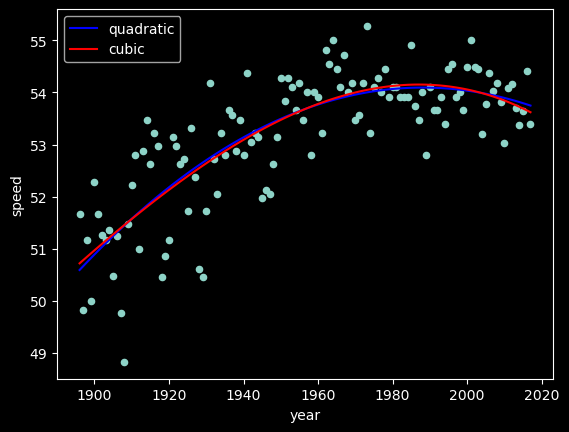

In [23]:
derby.plot(x = 'year', y = 'speed', kind = 'scatter')
plt.plot(derby['year'], lm_quad.fittedvalues, color = 'blue', label = 'quadratic')
plt.plot(derby['year'], lm_cubic.fittedvalues, color = 'red', label = 'cubic')
plt.legend();

Let's see if the coefficient on the cubed term is significant.

In [24]:
sm.stats.anova_lm(lm_quad, lm_cubic)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,119.0,72.221209,0.0,NaN,NaN,NaN
1,118.0,71.907071,1.0,0.314138,0.515502,0.474186


**Question:** How do we interpret this output?

## Question 1: How does the condition of the track affect the speed of the winner, after controlling for the year?

Now, let's add the condition of the track. This is a categorical variable, but statsmodels can recognize this and automatically account for that.

In [25]:
lm_condition = smf.ols('speed ~ year_z + I(year_z**2) + condition', data = derby).fit()
lm_condition.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     134.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           8.13e-43
Time:                        08:04:26   Log-Likelihood:                -98.505
No. Observations:                 122   AIC:                             207.0
Df Residuals:                     117   BIC:                             221.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            53.9282      0.080    671.535      0.000      53.769      54.087
condition[T.good]    -0.4987      0.187     -2.664      0.009      -0.870      -0.128
condition[T.slow]    -1.4205      0.131    -10.843      0.000      -1.680      -1.161
year_z                0.8107      0.052     15.672      0.000       0.708       0.913
I(year_z ** 2)       -0.4425      0.057     -7.751      0.000      -0.556      -0.329
==============================================================================
Omnibus:                        1.126   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.749
Skew:                          -0.171   Prob(JB):                        0.688
Kurtosis:                       3.175   Cond. No.                         6.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*"fast" is the reference category, so that's why it's not shown. T.good and T.slow are in reference to the reference category. coefs can be itnterpreted as reference to the reference category.*

Let's check and see if any of the new coefficients are statistically significant.

In [26]:
sm.stats.anova_lm(lm_quad, lm_condition)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,119.0,72.221209,0.0,NaN,NaN,NaN
1,117.0,35.908700,2.0,36.312509,59.157858,1.767231e-18


**Questions:** 

* Can we conclude that the effect of the condition is statistically significant, after accounting for year?
* How do we interpret the coefficients?

Let's also see how our fitted model looks against the data.

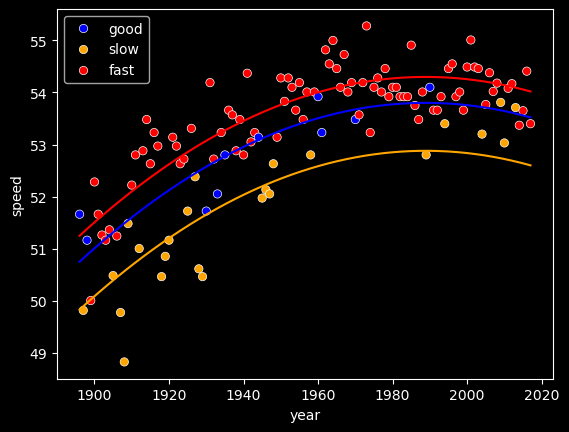

In [46]:
yearmin, yearmax = derby['year'].min(), derby['year'].max()
yearzmin, yearzmax = derby['year_z'].min(), derby['year_z'].max()

colors = ['blue', 'orange', 'red']

ax = sns.scatterplot(data = derby,
                     x = 'year',
                     y = 'speed',
                     hue = 'condition',
                     palette = colors)
for condition, color in zip(['good', 'slow', 'fast'], colors):
    pred = pd.DataFrame({
            'year': np.linspace(start = yearmin, stop = yearmax, num = 50),
            'year_z': np.linspace(start = yearzmin, stop = yearzmax, num = 50),
            'condition': condition
        })
    pred['prediction'] = lm_condition.predict(pred)
    
    pred.plot(x = 'year', y = 'prediction', color = color, ax = ax, label = '')

plt.legend();

## Interactions


You may notice that the curve for slow conditions looks to be a bit low for the higher years.

Does the effect of year differ for different track conditions and can we estimate that effect from our data? To check this, we can add interaction terms. These are created by multiplying our variables together.

In [28]:
lm_interaction = smf.ols('speed ~ year_z + I(year_z**2) + condition + (year_z + I(year_z**2)):condition', data = derby).fit()
lm_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     78.26
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.70e-42
Time:                        08:04:26   Log-Likelihood:                -89.064
No. Observations:                 122   AIC:                             196.1
Df Residuals:                     113   BIC:                             221.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           54.0097      0.082    655.815      0.000      53.847      54.173
condition[T.good]                   -0.8206      0.227     -3.620      0.000      -1.270      -0.372
condition[T.slow]                   -1.5321      0.210     -7.283      0.000      -1.949      -1.115
year_z                               0.7206      0.058     12.430      0.000       0.606       0.835
year_z:condition[T.good]             0.3945      0.309      1.276      0.205      -0.218       1.007
year_z:condition[T.slow]             0.4052      0.117      3.470      0.001       0.174       0.637
I(year_z ** 2)                      -0.5152      0.064     -8.012      0.000      -0.643      -0.388
I(year_z ** 2):condition[T.good]     0.5195      0.244      2.128      0.036       0.036       1.003
I(year_z ** 2):condition[T.slow]     0.1847      0.142      1.301      0.196      -0.097       0.466
==============================================================================
Omnibus:                        0.804   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.669   Jarque-Bera (JB):                0.460
Skew:                          -0.125   Prob(JB):                        0.795
Kurtosis:                       3.168   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
sm.stats.anova_lm(lm_condition, lm_interaction)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,117.0,35.90870,0.0,NaN,NaN,NaN
1,113.0,30.75978,4.0,5.14892,4.728804,0.00145


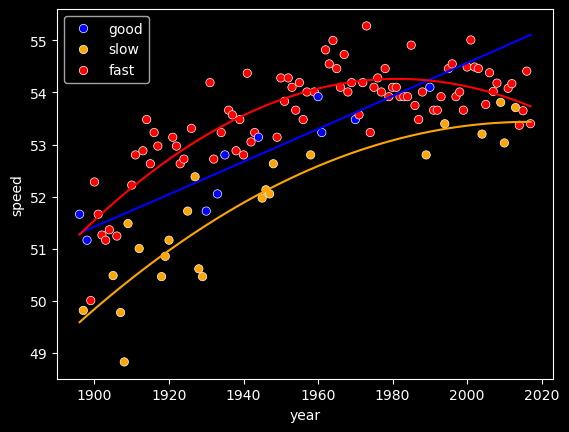

In [47]:
yearmin, yearmax = derby['year'].min(), derby['year'].max()
yearzmin, yearzmax = derby['year_z'].min(), derby['year_z'].max()

colors = ['blue', 'orange', 'red']

ax = sns.scatterplot(data = derby,
                     x = 'year',
                     y = 'speed',
                     hue = 'condition',
                     palette = colors)

for condition, color in zip(['good', 'slow', 'fast'], colors):
    pred = pd.DataFrame({
            'year': np.linspace(start = yearmin, stop = yearmax, num = 50),
            'year_z': np.linspace(start = yearzmin, stop = yearzmax, num = 50),
            'condition': condition
        })
    pred['prediction'] = lm_interaction.predict(pred)
    
    pred.plot(x = 'year', y = 'prediction', color = color, ax = ax, label = '')

plt.legend();

**Question:** The curve for good tracks looks strange for the more recent years. What is going on there?

## Question 2: Does the number of starters have a statistically significant effect, after controlling for the year and the condition of the track?

In [31]:
lm_starters = smf.ols('speed ~ year_z + I(year_z**2) + condition + starters + (year_z + I(year_z**2)):condition', data = derby).fit()
lm_starters.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     70.41
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.80e-42
Time:                        08:04:26   Log-Likelihood:                -87.978
No. Observations:                 122   AIC:                             196.0
Df Residuals:                     112   BIC:                             224.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           54.2740      0.204    266.642      0.000      53.871      54.677
condition[T.good]                   -0.7841      0.227     -3.453      0.001      -1.234      -0.334
condition[T.slow]                   -1.4846      0.212     -7.000      0.000      -1.905      -1.064
year_z                               0.7843      0.073     10.722      0.000       0.639       0.929
year_z:condition[T.good]             0.3442      0.310      1.111      0.269      -0.270       0.958
year_z:condition[T.slow]             0.3983      0.116      3.423      0.001       0.168       0.629
I(year_z ** 2)                      -0.5230      0.064     -8.140      0.000      -0.650      -0.396
I(year_z ** 2):condition[T.good]     0.4716      0.245      1.921      0.057      -0.015       0.958
I(year_z ** 2):condition[T.slow]     0.1600      0.142      1.124      0.263      -0.122       0.442
starters                            -0.0186      0.013     -1.418      0.159      -0.045       0.007
==============================================================================
Omnibus:                        1.146   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.715
Skew:                          -0.140   Prob(JB):                        0.699
Kurtosis:                       3.250   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
sm.stats.anova_lm(lm_interaction, lm_starters)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,113.0,30.759780,0.0,NaN,NaN,NaN
1,112.0,30.216958,1.0,0.542822,2.011984,0.158838


**Question:** What conclusion can we draw from this test?

Recall that originally, it appeared that there might be a quadratic relationship. Let's check the residuals of our interaction model vs. the number of starters and see if that quadratic trend still appears.

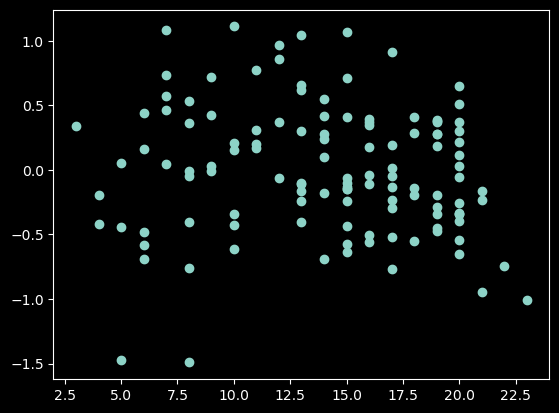

In [33]:
plt.scatter(x = derby['starters'], y = lm_interaction.resid);

Let's see what happens if we add this to our model.

In [34]:
lm_starters_quad = smf.ols('speed ~ year_z + I(year_z**2) + condition + starters + I(starters**2) + (year_z + I(year_z**2)):condition', data = derby).fit()
lm_starters_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     70.54
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.13e-43
Time:                        08:04:26   Log-Likelihood:                -81.900
No. Observations:                 122   AIC:                             185.8
Df Residuals:                     111   BIC:                             216.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           52.7740      0.481    109.729      0.000      51.821      53.727
condition[T.good]                   -0.8846      0.219     -4.038      0.000      -1.319      -0.451
condition[T.slow]                   -1.5052      0.203     -7.423      0.000      -1.907      -1.103
year_z                               0.7174      0.073      9.881      0.000       0.574       0.861
year_z:condition[T.good]             0.3524      0.296      1.190      0.237      -0.234       0.939
year_z:condition[T.slow]             0.3701      0.111      3.319      0.001       0.149       0.591
I(year_z ** 2)                      -0.4058      0.070     -5.766      0.000      -0.545      -0.266
I(year_z ** 2):condition[T.good]     0.5054      0.235      2.153      0.033       0.040       0.971
I(year_z ** 2):condition[T.slow]     0.1629      0.136      1.197      0.234      -0.107       0.432
starters                             0.2102      0.068      3.080      0.003       0.075       0.345
I(starters ** 2)                    -0.0082      0.002     -3.410      0.001      -0.013      -0.003
==============================================================================
Omnibus:                        3.271   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                2.707
Skew:                          -0.289   Prob(JB):                        0.258
Kurtosis:                       3.445   Cond. No.                     2.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
sm.stats.anova_lm(lm_interaction, lm_starters_quad)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,113.0,30.759780,0.0,NaN,NaN,NaN
1,111.0,27.351575,2.0,3.408205,6.915704,0.001477


How can we interpret these coefficients?

A negative coefficient on the squared term says that the estimated mean will increase as the number of starters increases up to a point and then decrease. If we want to find the maximum, we can use a little bit of algebra.

In [36]:
a = lm_starters_quad.params['I(starters ** 2)']
b = lm_starters_quad.params['starters']

print(-b/(2*a))

12.775296401370035
